## **Importing Libraries** 

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# **Cleaning Data**

In [77]:
df = pd.read_csv("customer_dataset.csv")##loading dataset
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_30280\3281843318.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("customer_dataset.csv")##loading dataset


,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [78]:
df = df.drop(columns=['customer_id'])##dropping customer id column
init_len = df.shape[0]
df.shape

(570000, 3)

In [79]:
df.dtypes

average_monthly_spend               object
average_monthly_visit_frequency     object
average_monthly_basket_size        float64
dtype: object

In [80]:
df = df.dropna()##dropping nan values
fin_len = df.shape[0]
df.shape

(542000, 3)

In [81]:
print("NaN percentage = ",((init_len-fin_len)*100/init_len))##Checking nan percentage

NaN percentage =  4.912280701754386


In [82]:
# Convert the column 'average_monthly_spend' to numeric values, coercing errors to NaN
df['Spend'] = pd.to_numeric(df['average_monthly_spend'], errors='coerce')

# Identify rows that have NaN in the converted column
problematic_rows = df[df['Spend'].isna()]
problematic_rows

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,Spend
26,nine hundred,1.9,1.24,NaN


In [83]:
df.at[26, 'average_monthly_spend'] = 900##fixing error of incorrect format manually

In [84]:
# Convert the column 'average_monthly_visit_frequency' to numeric values, coercing errors to NaN
df['Frequency'] = pd.to_numeric(df['average_monthly_visit_frequency'], errors='coerce')

# Identify rows that have NaN in the converted column
problematic_rows = df[df['Frequency'].isna()]
problematic_rows

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,Spend,Frequency
322986,8017.0,one point two,4.00,8017.0,NaN
323648,92323.0,nine point five,35.22,92323.0,NaN
324577,6425.0,two,3.62,6425.0,NaN
326775,96690.0,twenty two,17.52,96690.0,NaN
569999,4225.0,three point four,1.92,4225.0,NaN


In [85]:
##Correcting incorrect format errors manually
df.at[322986, 'average_monthly_visit_frequency'] = 1.2
df.at[323648, 'average_monthly_visit_frequency'] = 9.5 
df.at[324577, 'average_monthly_visit_frequency'] = 2 
df.at[326775, 'average_monthly_visit_frequency'] = 22 
df.at[569999, 'average_monthly_visit_frequency'] = 3.4 

In [86]:
#Converting all to numeric format
df['average_monthly_visit_frequency'] = pd.to_numeric(df['average_monthly_visit_frequency'], errors='coerce')
df['average_monthly_spend'] = pd.to_numeric(df['average_monthly_spend'], errors='coerce')
df = df.drop(columns=['Spend','Frequency'])
df.head()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,790.0,1.11,2.84
1,176875.0,15.74,33.83
3,38542.0,7.82,10.73
4,48712.0,7.51,10.04
5,172333.0,14.16,35.06


In [87]:
df.dtypes

average_monthly_spend              float64
average_monthly_visit_frequency    float64
average_monthly_basket_size        float64
dtype: object

In [88]:
num_duplicates = df.duplicated().sum()##finding number of duplicates

print("Number of duplicates in the DataFrame:", num_duplicates)

Number of duplicates in the DataFrame: 10017


In [89]:
df = df.drop_duplicates()#dropping duplicates
num_duplicates = df.duplicated().sum()

print("Number of duplicates in the DataFrame:", num_duplicates)

Number of duplicates in the DataFrame: 0


In [90]:
#Finding the percentage of nan removed
fin_len = df.shape[0]
print("NaN percentage = ",((init_len-fin_len)*100/init_len))

NaN percentage =  6.669649122807018


In [91]:
df_cleaned = df.copy()#Making a copy of the dataframe for removing outliers

# **Removing Outliers**

### Visualizing outliers

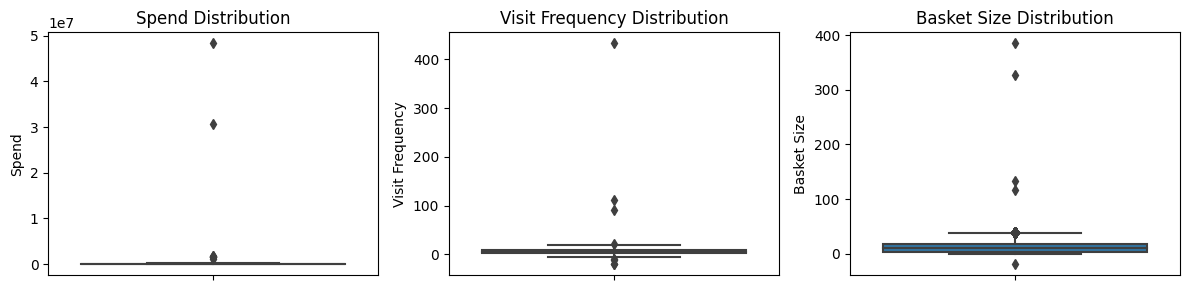

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  # 3 rows, 1 column

# Plot boxplots for average_monthly_spend, average_monthly_visit_frequency, and average_monthly_basket_size
sns.boxplot(y='average_monthly_spend', data=df_cleaned, ax=axes[0])
axes[0].set_title('Spend Distribution')
axes[0].set_ylabel('Spend')

sns.boxplot(y='average_monthly_visit_frequency', data=df_cleaned, ax=axes[1])
axes[1].set_title('Visit Frequency Distribution')
axes[1].set_ylabel('Visit Frequency')

sns.boxplot(y='average_monthly_basket_size', data=df_cleaned, ax=axes[2])
axes[2].set_title('Basket Size Distribution')
axes[2].set_ylabel('Basket Size')

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('Outliers.eps', format='eps')

# Display the plots
plt.show()

In [93]:
def remove_outliers_iqr_column(df, column_name,threshold):
    # Extract the specified column
    column = df[column_name]
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Determine outliers for the specified column
    outliers = (column < (Q1 - threshold * IQR)) | (column > (Q3 + threshold * IQR))
    
    # Remove rows containing outliers for the specified column
    df_no_outliers = df[~outliers]
    
    return df_no_outliers

### Removing outliers in average monthly spend

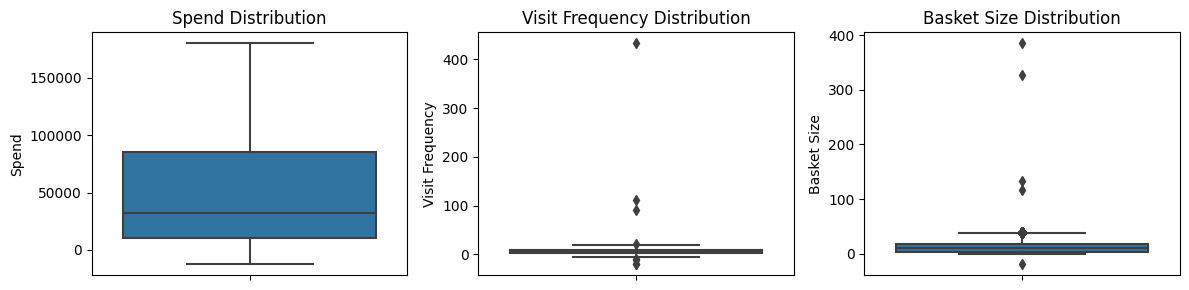

In [94]:
df_cleaned = remove_outliers_iqr_column(df_cleaned, 'average_monthly_spend',2.5)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  # 3 rows, 1 column

# Plot boxplots for average_monthly_spend, average_monthly_visit_frequency, and average_monthly_basket_size
sns.boxplot(y='average_monthly_spend', data=df_cleaned, ax=axes[0])
axes[0].set_title('Spend Distribution')
axes[0].set_ylabel('Spend')

sns.boxplot(y='average_monthly_visit_frequency', data=df_cleaned, ax=axes[1])
axes[1].set_title('Visit Frequency Distribution')
axes[1].set_ylabel('Visit Frequency')

sns.boxplot(y='average_monthly_basket_size', data=df_cleaned, ax=axes[2])
axes[2].set_title('Basket Size Distribution')
axes[2].set_ylabel('Basket Size')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

### Removing outliers in average monthly visit frequency

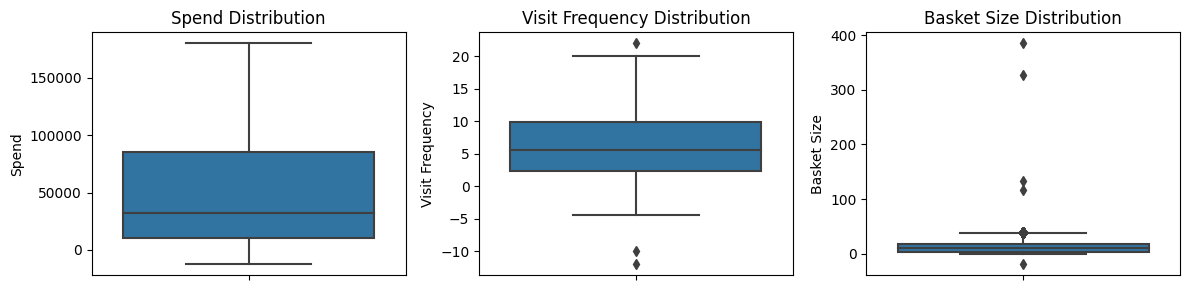

In [95]:
df_cleaned = remove_outliers_iqr_column(df_cleaned, 'average_monthly_visit_frequency',2.5)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  # 3 rows, 1 column

# Plot boxplots for average_monthly_spend, average_monthly_visit_frequency, and average_monthly_basket_size
sns.boxplot(y='average_monthly_spend', data=df_cleaned, ax=axes[0])
axes[0].set_title('Spend Distribution')
axes[0].set_ylabel('Spend')

sns.boxplot(y='average_monthly_visit_frequency', data=df_cleaned, ax=axes[1])
axes[1].set_title('Visit Frequency Distribution')
axes[1].set_ylabel('Visit Frequency')

sns.boxplot(y='average_monthly_basket_size', data=df_cleaned, ax=axes[2])
axes[2].set_title('Basket Size Distribution')
axes[2].set_ylabel('Basket Size')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

### Removing outliers in average monthly basket size

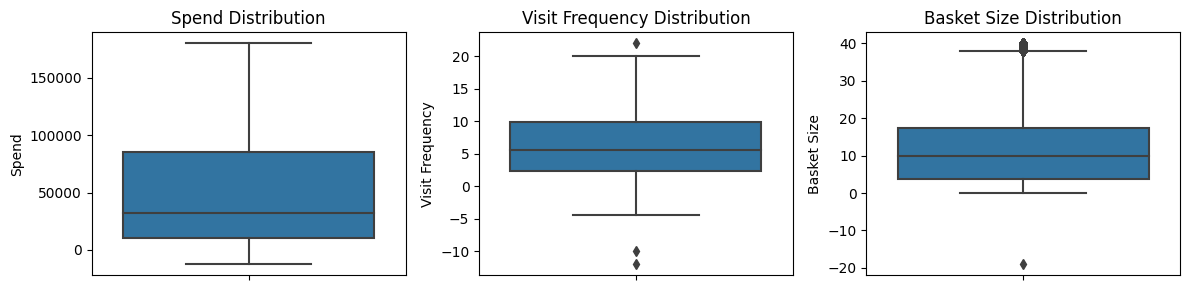

In [96]:
df_cleaned = remove_outliers_iqr_column(df_cleaned, 'average_monthly_basket_size',2.5)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  # 3 rows, 1 column

# Plot boxplots for average_monthly_spend, average_monthly_visit_frequency, and average_monthly_basket_size
sns.boxplot(y='average_monthly_spend', data=df_cleaned, ax=axes[0])
axes[0].set_title('Spend Distribution')
axes[0].set_ylabel('Spend')

sns.boxplot(y='average_monthly_visit_frequency', data=df_cleaned, ax=axes[1])
axes[1].set_title('Visit Frequency Distribution')
axes[1].set_ylabel('Visit Frequency')

sns.boxplot(y='average_monthly_basket_size', data=df_cleaned, ax=axes[2])
axes[2].set_title('Basket Size Distribution')
axes[2].set_ylabel('Basket Size')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

## **Removing negative values**

In [97]:
df_cleaned = df_cleaned[(df_cleaned > 0).all(axis=1)]

## **Visualizing final cleaned dataset**

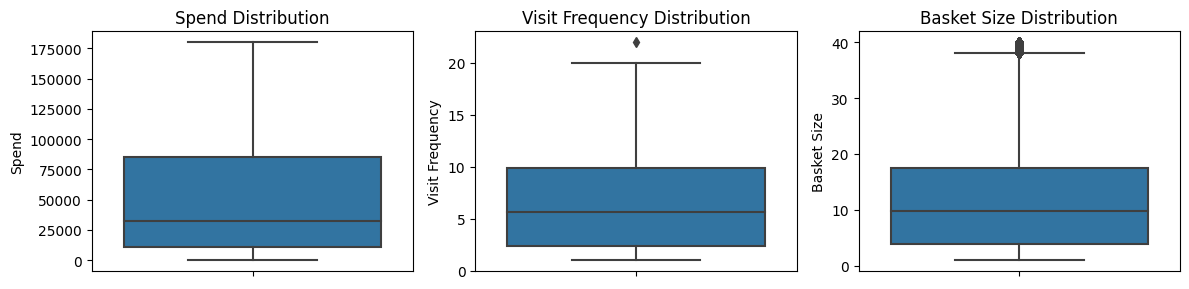

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  # 3 rows, 1 column

# Plot boxplots for average_monthly_spend, average_monthly_visit_frequency, and average_monthly_basket_size
sns.boxplot(y='average_monthly_spend', data=df_cleaned, ax=axes[0])
axes[0].set_title('Spend Distribution')
axes[0].set_ylabel('Spend')

sns.boxplot(y='average_monthly_visit_frequency', data=df_cleaned, ax=axes[1])
axes[1].set_title('Visit Frequency Distribution')
axes[1].set_ylabel('Visit Frequency')

sns.boxplot(y='average_monthly_basket_size', data=df_cleaned, ax=axes[2])
axes[2].set_title('Basket Size Distribution')
axes[2].set_ylabel('Basket Size')

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('No_outliers.eps', format='eps')

# Display the plots
plt.show()

In [99]:
fin_len = df_cleaned.shape[0]
print("Number of rows removed = ",(init_len-fin_len))
print("Percentage = ",((init_len-fin_len)*100/init_len))

Number of rows removed =  38050
Percentage =  6.675438596491228


In [100]:
df_cleaned.to_csv('cleaned_df.csv', index=False)